In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import optimize

In [48]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

x_data_years = np.arange(1994,2023)

In [49]:
# Customize the default plotting style
plt.rcParams['figure.figsize'] = (8, 6)  # Set the default figure size
plt.rcParams['axes.labelsize'] = 14      # Set the default label font size
plt.rcParams['axes.titlesize'] = 16      # Set the default title font size
plt.rcParams['xtick.labelsize'] = 12     # Set the default x-axis tick font size
plt.rcParams['ytick.labelsize'] = 12     # Set the default y-axis tick font size
plt.rcParams['lines.linewidth'] = 2.0    # Set the default line width
plt.rcParams['lines.markersize'] = 8     # Set the default marker size
plt.rcParams['legend.fontsize'] = 12     # Set the default legend font size
plt.rcParams['axes.grid'] = True         # Enable grid lines by default

# Now, all subsequent plots in your script will use these settings


In [50]:
data_dir = 'C:/Users/leonh/Desktop/Praktikum_AWI/GVN/data/GVN_cont-meteo_1982-etseq/datasets/'
df_all = pd.DataFrame()
# Erstellen Sie eine leere Liste, um DataFrames zu speichern
#years = []



#Schleife für die Monate
for year in range(1983,2022):
    dataframes = []
    for month in range(1, 13):
        file = f'GVN_cont_meteorology_{year}-{month:02d}.tab'
        filename = data_dir + file

        comment_lines = 0
        with open(filename, 'r') as file:
            for line in file:
                if line.startswith('*/'):
                    break
                comment_lines += 1
        # Erzeugen des Dateinamens
        

        # Lesen der CSV-Datei für den aktuellen Monat
        df = pd.read_csv(filename,  skiprows=comment_lines+1,sep='\t')
        
        df['Date/Time'] = pd.to_datetime(df['Date/Time'])
        # print('Zahlen der NaN-Einträge: '+str(np.sum(np.isnan(df['T2 [°C] (average, Thermometer)']))))
        # df.loc[np.isnan(df['T2 [°C] (average, Thermometer)']),'T2 [°C] (average, Thermometer)'] = np.nanmean(df['T2 [°C] (average, Thermometer)'])
        df_all = pd.concat((df_all, df), ignore_index= True)
        # Fügen Sie den DataFrame zur Liste hinzu
        #dataframes.append(df)
    #years.append(dataframes.copy())







In [51]:
df_backup = df_all.copy()


In [52]:
#df_all = df_backup.copy()

In [53]:
print(df_all.columns)
df_all = df_all.drop(['SWU [W/m**2] (average, Pyranometer)', 'LWD [W/m**2] (average)'], axis= 1)

len(df_all.columns)

Index(['Date/Time', 'Height [m]', 'SWD [W/m**2] (average, Pyranometer)',
       'SWU [W/m**2] (average, Pyranometer)', 'LWD [W/m**2] (average)',
       'LWU [W/m**2] (average)', 'SSD [min] (average)',
       'T10 [°C] (average, Thermometer)', 'DD10 [deg] (average, Anemometer)',
       'FF10 [m/s] (average, Anemometer)', 'T2 [°C] (average, Thermometer)',
       'DD2 [deg] (average, Anemometer)', 'FF2 [m/s] (average, Anemometer)',
       'RH [%] (average, redundant measuremen...)',
       'RH [%] (average, redundant measuremen...).1',
       'PoPoPoPo [hPa] (average, Barometer)', 'SWD [W/m**2]', 'SWU [W/m**2]',
       'LWD [W/m**2]', 'LWU [W/m**2]', 'SSD [min]', 'T10 [°C]', 'DD10 [deg]',
       'FF10 [m/s]', 'T2 [°C]', 'DD2 [deg]', 'FF2 [m/s]', 'RH [%]',
       'PoPoPoPo [hPa]', 'DIF [W/m**2] (average, Pyranometer)',
       'SWD OG1 [W/m**2] (average, Pyranometer)',
       'SWD RG8 [W/m**2] (average, Pyranometer)',
       'LWD [W/m**2] (average, Pyrgeometer)',
       'LWU [W/m**2] (avera

61

In [54]:
df_all = df_all.drop(['Height [m]','SWD [W/m**2] (average, Pyranometer)', 'LWU [W/m**2] (average)', 'LWD [W/m**2]', 'LWU [W/m**2]', 'SWD OG1 [W/m**2] (average, Pyranometer)',
       'SWD RG8 [W/m**2] (average, Pyranometer)',
       'LWD [W/m**2] (average, Pyrgeometer)',
       'LWU [W/m**2] (average, Pyrgeometer)',   'UV rad [W/m**2] (average, Total Ultraviolet Ra...)','SWD OG1 [W/m**2]', 'SWD RG8 [W/m**2]', 'UV rad [W/m**2]','SSD [min] (Instantaneous value at end of...)',
       'T10 [°C] (1-min average, Thermometer, T...)',
       'DD10 [deg] (1-min average, Anemometer, Th...)',
       'FF10 [m/s] (1-min average, Anemometer, Th...)','DD2 [deg] (1-min average, Anemometer, Th...)',
       'FF2 [m/s] (1-min average, Anemometer, Th...)','DIF [W/m**2] (average, Pyranometer)','DD10 [deg]'], axis= 1)


In [55]:
print(df_all.columns)
df_all = df_all.drop(['DD2 [deg]', 'FF2 [m/s]', 'SWD OG1 [W/m**2] (1-min average, Pyranometer, E...)',
       'SWD RG8 [W/m**2] (1-min average, Pyranometer, E...)', 'LWD [W/m**2] (1-min average, Pyrgeometer, K...)', 'LWD [W/m**2] (1-min average; Sensor changed...)',
       'DD10 [deg] (average, Anemometer)', 'FF10 [m/s] (average, Anemometer)',
       'FF2 [m/s] (average, Anemometer)', 'SWD [W/m**2]', 'SWU [W/m**2]','CBH [m] (minimum 30000: no clouds dete...)','UV rad [W/m**2] (1-min average, Total Ultravio...)','T10 [°C] (average, Thermometer)','T10 [°C]'], axis= 1)

len(df_all.columns)

Index(['Date/Time', 'SSD [min] (average)', 'T10 [°C] (average, Thermometer)',
       'DD10 [deg] (average, Anemometer)', 'FF10 [m/s] (average, Anemometer)',
       'T2 [°C] (average, Thermometer)', 'DD2 [deg] (average, Anemometer)',
       'FF2 [m/s] (average, Anemometer)',
       'RH [%] (average, redundant measuremen...)',
       'RH [%] (average, redundant measuremen...).1',
       'PoPoPoPo [hPa] (average, Barometer)', 'SWD [W/m**2]', 'SWU [W/m**2]',
       'SSD [min]', 'T10 [°C]', 'FF10 [m/s]', 'T2 [°C]', 'DD2 [deg]',
       'FF2 [m/s]', 'RH [%]', 'PoPoPoPo [hPa]',
       'CBH [m] (minimum 30000: no clouds dete...)',
       'T2 [°C] (1-min average, Thermometer, T...)',
       'RH [%] (1-min average, redundant meas...)',
       'RH [%] (1-min average, redundant meas...).1',
       'PoPoPoPo [hPa] (1-min average, Barometer, Par...)',
       'SWD OG1 [W/m**2] (1-min average, Pyranometer, E...)',
       'SWD RG8 [W/m**2] (1-min average, Pyranometer, E...)',
       'UV rad [W/m**2] (1-

25

In [56]:
# 
columns_to_average = [
    'PoPoPoPo [hPa]',
    'PoPoPoPo [hPa] (average, Barometer)',
    'PoPoPoPo [hPa] (Barometer, Paroscientific, Di...)',
    'PoPoPoPo [hPa] (1-min average; Sensor changed...)',
    'PoPoPoPo [hPa] (1-min average, redundant meas...)',
    'PoPoPoPo [hPa] (1-min average, redundant meas...).1',
    'PoPoPoPo [hPa] (1-min average, Barometer, Par...)'
]

# Calculate the row-wise mean for the selected columns
df_all['PoPoPoPo'] = np.nanmean(df_all[columns_to_average], axis=1)

df_all = df_all.drop(['PoPoPoPo [hPa]', 'PoPoPoPo [hPa] (average, Barometer)','PoPoPoPo [hPa] (Barometer, Paroscientific, Di...)', 'PoPoPoPo [hPa] (1-min average; Sensor changed...)',
                                  'PoPoPoPo [hPa] (1-min average, redundant meas...)', 'PoPoPoPo [hPa] (1-min average, redundant meas...).1', 'PoPoPoPo [hPa] (1-min average, Barometer, Par...)'], axis = 1)

C:\Users\leonh\AppData\Local\Temp\ipykernel_21116\676634122.py:13: RuntimeWarning: Mean of empty slice
  df_all['PoPoPoPo'] = np.nanmean(df_all[columns_to_average], axis=1)


In [57]:
df_all['RH'] = np.nanmean(df_all[['RH [%]','RH [%] (average, redundant measuremen...)','RH [%] (average, redundant measuremen...).1','RH [%] (1-min average, redundant meas...)', 'RH [%] (1-min average, redundant meas...).1','RH [%] (nominal mounting height: 2m, ...)', 'RH [%] (nominal mounting height: 2m, ...).1','RH [%] (nominal mounting height: 10m,...)','RH [%] (nominal mounting height: 10m,...).1']], axis = 1)

df_all = df_all.drop(['RH [%]', 'RH [%] (average, redundant measuremen...)','RH [%] (average, redundant measuremen...).1','RH [%] (1-min average, redundant meas...)', 'RH [%] (1-min average, redundant meas...).1','RH [%] (nominal mounting height: 2m, ...)', 'RH [%] (nominal mounting height: 2m, ...).1','RH [%] (nominal mounting height: 10m,...)','RH [%] (nominal mounting height: 10m,...).1'], axis = 1)

C:\Users\leonh\AppData\Local\Temp\ipykernel_21116\2479146006.py:1: RuntimeWarning: Mean of empty slice
  df_all['RH'] = np.nanmean(df_all[['RH [%]','RH [%] (average, redundant measuremen...)','RH [%] (average, redundant measuremen...).1','RH [%] (1-min average, redundant meas...)', 'RH [%] (1-min average, redundant meas...).1','RH [%] (nominal mounting height: 2m, ...)', 'RH [%] (nominal mounting height: 2m, ...).1','RH [%] (nominal mounting height: 10m,...)','RH [%] (nominal mounting height: 10m,...).1']], axis = 1)


In [58]:
# df_all.columns
# df_all['T2'] = np.nanmean(df_all.loc[['T2 [°C] (average, Thermometer)', 'DD2 [deg] (average, Anemometer)','T2 [°C] (1-min average, Thermometer, T...)','T2 [°C] (1-min average; Sensor changed...)']], axis = 1)


# Specify the list of column names to average
columns_to_average = [
    'T2 [°C] (average, Thermometer)',
    'T2 [°C]',
    'T2 [°C] (1-min average, Thermometer, T...)',
    'T2 [°C] (1-min average; Sensor changed...)'
]

# Calculate the row-wise mean for the selected columns
df_all['T2'] = np.nanmean(df_all[columns_to_average], axis=1)


df_all = df_all.drop(['T2 [°C] (average, Thermometer)', 'DD2 [deg] (average, Anemometer)','T2 [°C]','T2 [°C] (1-min average, Thermometer, T...)','T2 [°C] (1-min average; Sensor changed...)'], axis = 1)

C:\Users\leonh\AppData\Local\Temp\ipykernel_21116\3424619239.py:14: RuntimeWarning: Mean of empty slice
  df_all['T2'] = np.nanmean(df_all[columns_to_average], axis=1)


In [59]:
df_all = df_all.drop(['SSD [min]','FF10 [m/s]','SSD [min] (average)'], axis = 'columns')

In [70]:
df_all.to_csv('df_all_GVN.csv')
# df_all = pd.read_csv('df_all_GVN.csv')
# df_all['Date/Time'] = pd.to_datetime(df_all['Date/Time'])

In [60]:
import datetime 
# Create an empty DataFrame for monthly aggregation
df_month = pd.DataFrame(columns= ['Date', 'T2Avg', 'T2Min', 'T2Max', 'RH', 'Pres'])
df_dates = pd.DataFrame(columns=['Date'])

for year in range(1983, 2022):
    for month in range(1, 13):
        start_date = pd.to_datetime(f'{year}-{month:02d}')
        if month < 12:
            end_date = pd.to_datetime(f'{year}-{month+1:02d}')
        else:
            end_date = pd.to_datetime(f'{year+1}-01')
        
        # Filter the data for the current month
        filtered_data = df_all[(df_all['Date/Time'] >= start_date) & (df_all['Date/Time'] < end_date)]
        
        day_min_month = []
        day_max_month = []

        for i in range (1, 29):
            filtered_data_day = filtered_data[(filtered_data['Date/Time'] >=  start_date+ datetime.timedelta(days=i-1)) & (filtered_data['Date/Time'] < start_date+ datetime.timedelta(days=i))]
            day_min = np.min(filtered_data_day['T2'])
            day_max = np.max(filtered_data_day['T2'])
            day_min_month.append(day_min)
            day_max_month.append(day_max)


        day_max_mean = np.nanmean(day_max_month)
        day_min_mean = np.nanmean(day_min_month)
        # Calculate the mean for each column in the filtered data
        temp_T2 = np.nanmean(filtered_data['T2'])
        temp_RH = np.nanmean(filtered_data['RH'])
        temp_Pres = np.nanmean(filtered_data['PoPoPoPo'])
        
        temp_df = pd.DataFrame({'Date':[start_date], 'T2Avg': [temp_T2], 'T2Min': [day_min_mean], 'T2Max': [day_max_mean], 'RH':[temp_RH], 'Pres': [temp_Pres]})
        df_month = pd.concat([df_month, temp_df], ignore_index= True)
       



C:\Users\leonh\AppData\Local\Temp\ipykernel_21116\1992398204.py:30: RuntimeWarning: Mean of empty slice
  day_max_mean = np.nanmean(day_max_month)
C:\Users\leonh\AppData\Local\Temp\ipykernel_21116\1992398204.py:31: RuntimeWarning: Mean of empty slice
  day_min_mean = np.nanmean(day_min_month)
C:\Users\leonh\AppData\Local\Temp\ipykernel_21116\1992398204.py:33: RuntimeWarning: Mean of empty slice
  temp_T2 = np.nanmean(filtered_data['T2'])
C:\Users\leonh\AppData\Local\Temp\ipykernel_21116\1992398204.py:34: RuntimeWarning: Mean of empty slice
  temp_RH = np.nanmean(filtered_data['RH'])
C:\Users\leonh\AppData\Local\Temp\ipykernel_21116\1992398204.py:35: RuntimeWarning: Mean of empty slice
  temp_Pres = np.nanmean(filtered_data['PoPoPoPo'])


In [61]:
# Calculating DTR
df_month['DTR'] = np.subtract(df_month['T2Max'], df_month['T2Min'])

In [75]:
df_years = pd.DataFrame(columns= ['Date', 'T2Avg', 'T2Min', 'T2Max', 'DTR', 'RH', 'Pres'])


for year in range(1983,2022):
        start_date = pd.to_datetime(f'{year}-01')
        end_date = pd.to_datetime(f'{year+1}-01')

        # Filter the data for the current month
        filtered_data = df_month[(df_month['Date'] >= start_date) & (df_month['Date'] < end_date)]




        day_max_mean = np.nanmean(filtered_data['T2Max'])
        day_min_mean = np.nanmean(filtered_data['T2Min'])
        temp_DTR = np.nanmean(filtered_data['DTR'])
        # Calculate the mean for each column in the filtered data
        temp_T2 = np.nanmean(filtered_data['T2Avg'])
        temp_RH = np.nanmean(filtered_data['RH'])
        temp_Pres = np.nanmean(filtered_data['Pres'])
        
        temp_df = pd.DataFrame({'Date':[start_date], 'T2Avg': [temp_T2], 'T2Min': [day_min_mean], 'T2Max': [day_max_mean],'DTR': [temp_DTR], 'RH':[temp_RH], 'Pres': [temp_Pres]})
        df_years = pd.concat([df_years, temp_df], ignore_index= True)

In [72]:
#df_month.to_csv('Dataframe_Month_Averages.csv')

In [73]:
#plt.plot(df_month['Date'], df_month['DTR'])

In [74]:
# plt.plot(df_month['Date'], df_month['T2Avg'])

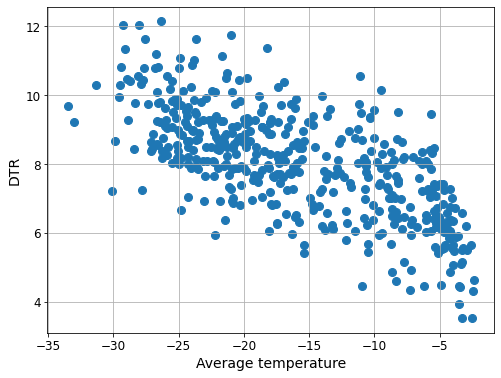

In [78]:
plt.scatter(df_month['T2Avg'], df_month['DTR'])

plt.xlabel('Average temperature')
plt.ylabel('DTR')

# plt.savefig('GVN_T2Avg_DTR.png', dpi = 300)

plt.show()



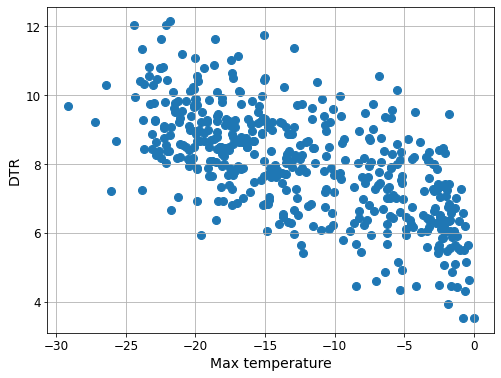

In [66]:
plt.scatter(df_month['T2Max'], df_month['DTR'])

plt.xlabel('Max temperature')
plt.ylabel('DTR')

 
plt.show()

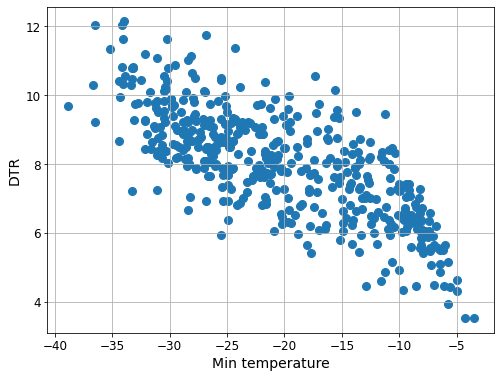

In [67]:
plt.scatter(df_month['T2Min'], df_month['DTR'])

plt.xlabel('Min temperature')
plt.ylabel('DTR')


plt.show()

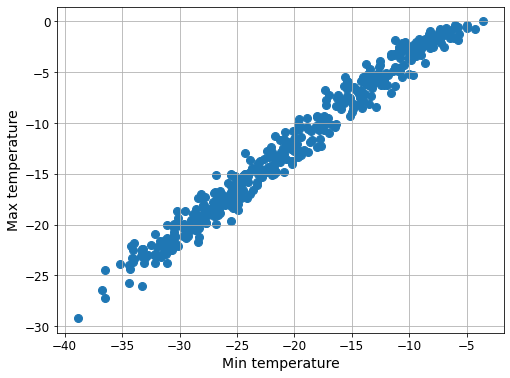

In [68]:
plt.scatter(df_month['T2Min'], df_month['T2Max'])

plt.xlabel('Min temperature')
plt.ylabel('Max temperature')


plt.show()

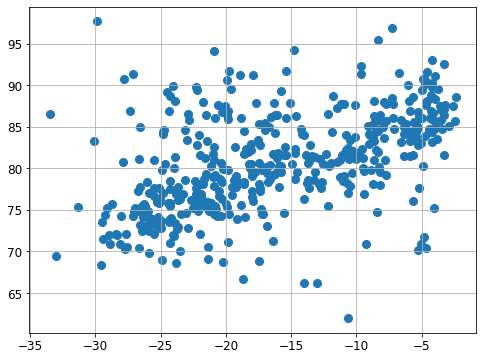

In [71]:
plt.scatter( df_month['T2Avg'], df_month['RH'],)



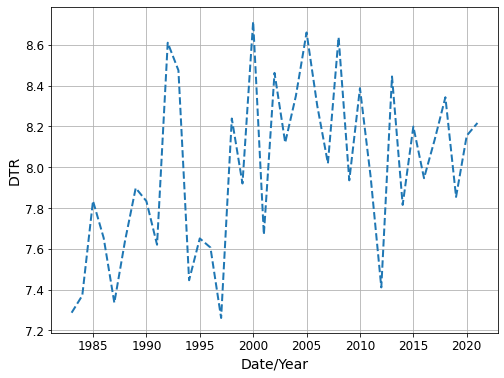

In [81]:
plt.plot(df_years['Date'], df_years['DTR'], ls = '--')

plt.xlabel('Date/Year')
plt.ylabel('DTR')

plt.savefig('GVN_Date_DTR.png', dpi = 300)

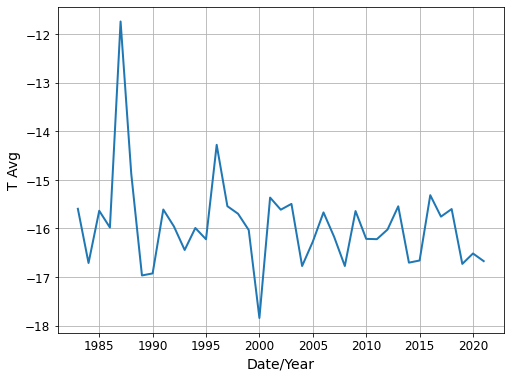

In [83]:
plt.plot(df_years['Date'], df_years['T2Avg'])

plt.xlabel('Date/Year')
plt.ylabel('T Avg')

plt.savefig('GVN_Date_T2Avg.png', dpi = 300)
